# Data Preprocessing

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [2]:
train, test = tf.keras.datasets.mnist.load_data()

In [3]:
x_train, y_train = train

In [4]:
x_test, y_test = test

### Visualization

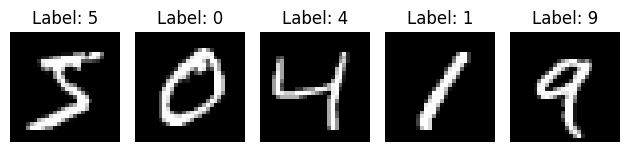

In [5]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap = 'grey')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Reshaping the Data

###### CNNs expect images with an explicit channel dimension. For greyscale: 1 channel

In [6]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [7]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

In [8]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


### Normalize the Pixel Values (0, 255) -> (0, 1)

###### Neural Networks work better with input values in the range (0, 1)

In [9]:
x_train /= 255.0
x_test /= 255.0

### One-hot Encode the Labels

###### Label 3 would be encoded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [10]:
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (60000,)
y_test shape: (10000,)


In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Building the CNN Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation = 'relu'),

    Dense(10, activation = 'softmax')
])

model.summary()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'Precision']
)

In [16]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - Precision: 0.9468 - accuracy: 0.9029 - loss: 0.3172 - val_Precision: 0.9855 - val_accuracy: 0.9833 - val_loss: 0.0576
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - Precision: 0.9856 - accuracy: 0.9841 - loss: 0.0504 - val_Precision: 0.9882 - val_accuracy: 0.9865 - val_loss: 0.0450
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - Precision: 0.9912 - accuracy: 0.9904 - loss: 0.0316 - val_Precision: 0.9886 - val_accuracy: 0.9877 - val_loss: 0.0400
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - Precision: 0.9939 - accuracy: 0.9935 - loss: 0.0196 - val_Precision: 0.9865 - val_accuracy: 0.9849 - val_loss: 0.0526
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - Precision: 0.9950 - accuracy: 0.9948 - loss: 0.0158 - val_Precision: 0.9901 - val_accuracy: 0.9894 - val_loss: 0.0413
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - Precision: 0.9966 - accuracy: 0.9964 - loss: 0.0109 - val_Prec

# Analyze Training Performance

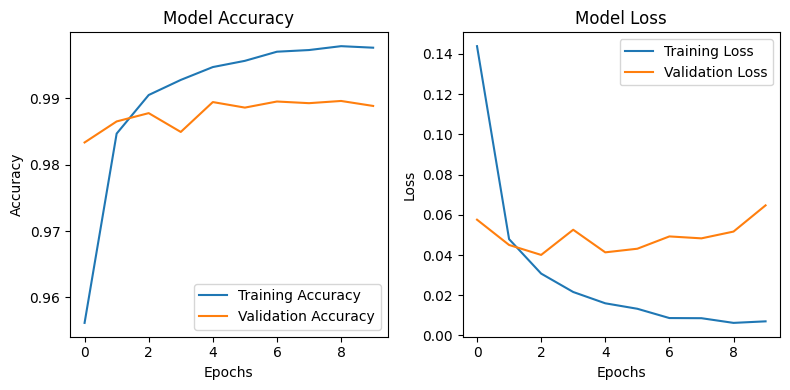

In [17]:
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation on Test Data

In [18]:
test_loss, test_accuracy, test_precision = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Precision: 0.9854 - accuracy: 0.9849 - loss: 0.0682
Test Loss: 0.049430590122938156
Test Accuracy: 0.9889000058174133
Test Precision: 0.9892925024032593


In [19]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis = 1)
actual_classes = np.argmax(y_test, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [20]:
misclassified_indices = np.where(predicted_classes != actual_classes)[0]

print(f'Number of misclassified samples: {len(misclassified_indices)}')

Number of misclassified samples: 111


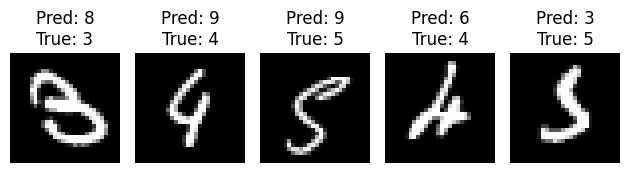

In [21]:
for i, index in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap = 'grey')
    plt.title(f'Pred: {predicted_classes[index]}\nTrue: {np.argmax(y_test[index])}')
    plt.axis('off')

plt.tight_layout()
plt.show()